# Implementing Multivariate Linear Regression with Regularization

**Importing necessary libraries and datasets**

In [1]:
import numpy as np
from sklearn import metrics, datasets,linear_model
from sklearn.preprocessing import StandardScaler

In [2]:
X,y = datasets.load_boston(return_X_y = True)
# X,y = datasets.load_diabetes(return_X_y = True)
X.shape

(506, 13)

**Dividing the data into training set and testing set**

In [3]:
X_train = X[0:400,:]

# create a temp array with all zeros of shape (400,14) for adding one extra column of ones
shape_tuple = (X_train.shape[0], X_train.shape[1] + 1);
X_temp = np.zeros(shape_tuple)
print(X_temp.shape)

# create a column vector of shape (400,1) containing all the ones for X0
column1 = np.ones(X_train.shape[0])
print(column1.shape)

# add this column as the first column of X_temp
X_temp[:,0] = column1;
print(X_temp)

# add the rest of the training data to it and finally assign it back to X_train
X_temp[:,1:] = X_train;
X_train = X_temp;
print(X_train.shape)


# getting our y_train vector
y_train = y[0:400]
print(y_train.shape)

(400, 14)
(400,)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
(400, 14)
(400,)


In [4]:
# remaining data will be our testing data

X_test = X[400:,:]
print(X_test.shape)

# create a temp array with all zeros of shape (400,14) for adding one extra column of ones
shape_tuple = (X_test.shape[0], X_test.shape[1] + 1);
X_temp = np.zeros(shape_tuple)

# create a column vector of shape (400,1) containing all the ones for X0
column1 = np.ones(X_test.shape[0])

# add this column as the first column of X_temp
X_temp[:,0] = column1;

# add the rest of the training data to it and finally assign it back to X_train
X_temp[:,1:] = X_test;
X_test = X_temp;
print(X_test.shape)

# getting our y_test vector
y_test = y[400:]
print(y_test.shape)

(106, 13)
(106, 14)
(106,)


**Performing feature scaling**

In [5]:
# initializing the theta vector with random uniform values between 0 and 1
# shape of theta is (14,1)
theta = np.random.uniform(0,1,X_train.shape[1])
print(theta)

# feature scaling the X_train data to bring the range of values of all columns in [0,1]
scaler = StandardScaler()

# ftting the data (i.e. finding out the mean and standard dev for normalization)
scaler.fit(X_train[:,1:])

# scaling the data and assigning it back to X_train and X_test
X_train[:,1:] = scaler.transform(X_train[:,1:])
X_test[:,1:] = scaler.transform(X_test[:,1:])

[0.16835023 0.49088611 0.88289359 0.28850817 0.83930879 0.22870558
 0.82621311 0.32828494 0.95187766 0.31411452 0.19376779 0.12258663
 0.89482624 0.41542099]


## 1. Using Gradient Descent

In [6]:
epochs = 500
alpha = 0.01
m = X_train.shape[0]
n = X_train.shape[1]
j_history = np.zeros(epochs);
iterations = np.zeros(epochs);
lamb = 250

for i in range(0,epochs+1):
#     calculating the hypothesis function/ y_predicted by dot product of X_train and theta
#     X_train.shape = (400,14), theta.shape = (14,1), thus h.shape = (400,1). 
#     This way we predict 400 values from the given data
    h = np.dot(X_train,theta)
    
#     calculating the error between the original and the predicted values
#     h.shape = y_train.shape = (400,1), error.shape = (400,1)
    error = h - y_train;
    
#     reducing theta by the formula theta = theta - (alpha/m) * sum(h(i)-y(i)).x(i)
#     X_train.shape = (400,14), error.shape(400,1), thus we take transpose of X_train to give theta.shape = (14,1)
    theta[0] = theta[0] - ((alpha/m) * (X_train.T.dot(error))[0])
    theta[1:] = (theta[1:]*(1-(alpha * lamb)/m)) - ((alpha/m) * (X_train.T.dot(error))[1:]) 
    
    if (i != epochs):
        j_history[i] = (1/(2*m)) * np.sum((h-y_train)**2)
        iterations[i] = i
    
print("Theta vector: ", theta)
print("Theta shape: ", theta.shape)

Theta vector:  [24.17730456 -0.50990196  0.48875356 -0.39235334  0.5988887  -0.3576232
  2.74579981 -0.14120621 -0.95207942  0.4960241  -0.36467398 -1.26714608
  0.21429585 -2.3311631 ]
Theta shape:  (14,)


**Testing our model**

In [7]:
prediction = np.dot(X_test,theta)

print("MAE", metrics.mean_absolute_error(y_true=y_test,y_pred = prediction))
print("MSE", metrics.mean_squared_error(y_true=y_test,y_pred = prediction))

MAE 3.7836966627374946
MSE 21.233585263944637


**Checking convergence of cost function**

In [8]:
import matplotlib.pyplot as plt

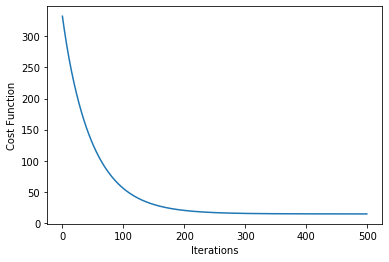

In [9]:
plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.plot(iterations,j_history)

## 2. Using normal equation

In [10]:
lamb = 250
L = np.zeros((X_train.shape[1],X_train.shape[1]))
for i in range(1,L.shape[0]):
    L[i,i] = 1
A = np.linalg.pinv(np.dot(X_train.T,X_train) + (lamb * L))
B = np.dot(X_train.T,y_train)

theta = np.dot(A,B)
theta

array([24.3345    , -0.51293403,  0.49275107, -0.39355658,  0.59766748,
       -0.37157604,  2.73831488, -0.14346448, -0.9703047 ,  0.50597191,
       -0.36866427, -1.27004253,  0.21190041, -2.33481914])

**Testing our model**

In [11]:
prediction = np.dot(X_test,theta)

print("MAE", metrics.mean_absolute_error(y_true=y_test,y_pred = prediction))
print("MSE", metrics.mean_squared_error(y_true=y_test,y_pred = prediction))

MAE 3.8656976463937753
MSE 22.01574870698202
